In [ ]:
import numpy as np

import math

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.random.uniform(-1, 1, size=(1000, 2))

labels = np.where(
    x[:, 0] > x[:, 1],
    0,
    np.where(
        (x[:, 0] < x[:, 1]) & (-x[:, 0] > x[:, 1]),
        1,
        2
    )
)

y = np.zeros((labels.shape[0], labels.max() + 1))
y[np.arange(labels.shape[0]), labels] = 1

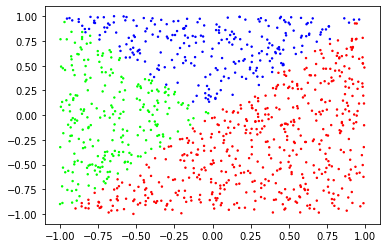

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=2)
plt.show()

In [ ]:
z = np.array([[9, 2, 1], [3, 4, 0]])

# вариант 1
# def softmax(z):
#     return np.exp(z) / np.exp(z).sum(axis=0)

# print(np.apply_along_axis(softmax, axis=1, z))

# вариант 2
from scipy.special import softmax
print(softmax(z, axis=1))

[[9.98754209e-01 9.10745952e-04 3.35044712e-04]
 [2.65387929e-01 7.21399184e-01 1.32128870e-02]]


In [ ]:
def grad(x, y, theta):
  l = len(y)
  cur = [[]]
  for s in range(len(theta)):
    rt = 0
    for i in range(l):
      rt += x[i] * (y[i,s] - (theta[s] @ x[i]) / np.exp(theta @ x[i]).sum())
    cur[s] = rt
    cur.append([])
  cur = np.array(cur[:-1])
  return -cur/l

In [ ]:
def sgd(x, y, n = 1000, alfa = 0.1, eps = 10**(-5)):
  theta_init = np.zeros((y.shape[1], x.shape[1]))
  theta_cur = theta_init + 100

  for i in range(n):
    theta_cur = theta_init - alfa * grad(x, y, theta_init)
    if np.linalg.norm(theta_cur - theta_init) < eps:
      return theta_init
    else:
      theta_init = theta_cur
  return theta_init

In [ ]:
theta = sgd(x, y)

In [ ]:
y_new = []
for i in range(len(y)):
  po = theta @ x[i]
  y_new.append([math.exp(po[0]) / np.exp(po).sum(), math.exp(po[1]) / np.exp(po).sum(), math.exp(po[2]) / np.exp(po).sum()])
y_new = np.array(y_new)

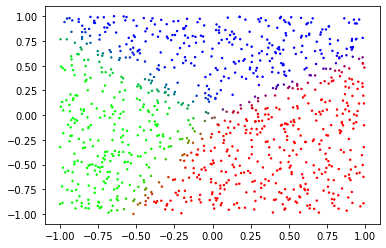

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y_new, s=2)
plt.show()